# Classificação de diabetes

* Base de dados utilizada para prever se um paciente tem diabetes baseado em diagnósticos
* Somente mulheres com até 21 anos de idade!

<img src=img/diabetes_input.png>

* INPUTS (entradas):
* * Pregnancies: Número de vezes que ficou grávida
* * GlucosePlasma: Concentração de glicose
* * BloodPressure:  Pressão sanguínea
* * Skin: Espessura da dobra do tríceps
* * Insulin: Insulina sérica de 2 horas
* * BMI: Índice de massa corporal
* * DiabetesPedigreeFunction: Histórico de diabetes na família
* * Age: Idade

<br>

* OUTPUTS:
* * Diabetes or no diabetes (0 or 1)


<img src=img/diabetes_rna.png>

- Base de dados
Acknowledgements Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

# Etapa 1: Importação das bibliotecas

In [ ]:
# descomentar para google colab
# %tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
tf.__version__

'2.17.0'

# Etapa 2: Importação da base de dados

In [ ]:
diabetes = pd.read_csv('diabetes.csv')

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Etapa 3: Limpeza e visualização dos dados

<Axes: >

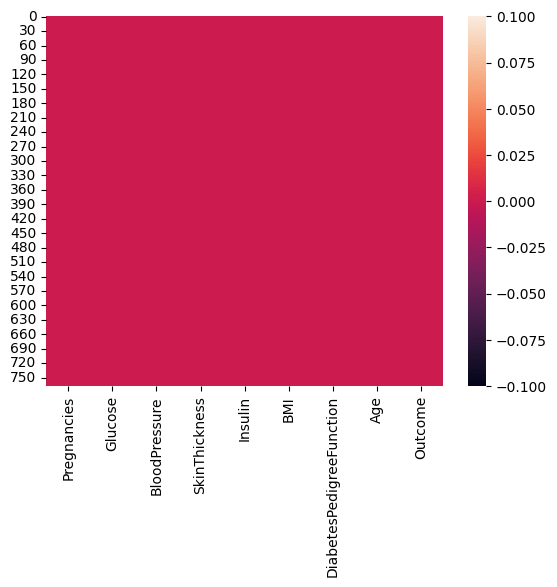

In [ ]:
sns.heatmap(diabetes.isnull())

# Etapa 4: Construção e treinamento do modelo

In [ ]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3778 - loss: 0.7259
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6833 - loss: 0.6587 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7381 - loss: 0.6125  
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7547 - loss: 0.5850  
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7530 - loss: 0.5630  
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7648 - loss: 0.5293 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7688 - loss: 0.5105 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8023 - loss: 0.4667 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7942 - loss: 0.4538  
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7954 - loss: 0.4422  
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7797 - loss: 0.4529 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

# Etapa 6: Avaliação do modelo

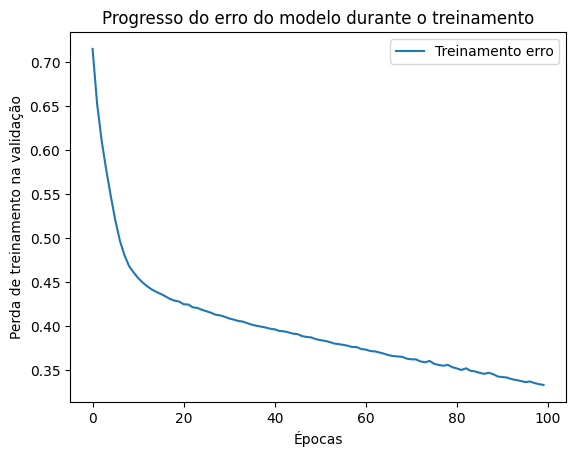

In [ ]:
plt.plot(epochs_hist.history['loss'])
# plt.plot(epochs_hist.history['val_loss'])
plt.title('Progresso do erro do modelo durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda de treinamento na validação')
plt.legend(['Treinamento erro', 'Validação erro']);

# você avalia se deve treinar por mais épocas ou não

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7264 - loss: 0.5718  
Accuracy: 0.7272727489471436


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.8)
print(classification_report(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        99
           1       0.74      0.36      0.49        55

    accuracy                           0.73       154
   macro avg       0.73      0.65      0.65       154
weighted avg       0.73      0.73      0.70       154

